In [1]:
#%%timeit
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#%%timeit
df = pd.read_excel("PERM_FY2020_Q3.xlsx")

In [3]:
df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_INFO_DECL_TITLE
0,A-09245-62715,Denied,2009-09-03,2020-04-30 14:50:29,N,NaT,NaN,N,SATURN ENTERPRISES INC,2340 N WASHTENAW AVE,...,NaN,N,N,N,N,Christopher E Kurczaba,Attorney,kurczabalaw@sbcglobal.net,Zygmunt Oparowski,President
1,A-10119-96737,Certified-Expired,2010-03-29,2019-10-18 11:34:37,Y,2000-09-15,MARYLAND,N,FIL PARONG,13528 JAMIESON PL,...,NaN,N,N,N,N,WINSTON W TSAI,ATTORNEY AT LAW,WINSTONTSAI@AOL.COM,FIL PARONG,HEAD OF HOUSEHOLD
2,A-10225-13679,Denied,2010-08-10,2020-04-30 07:55:08,N,NaT,NaN,N,GLENNS PLUMBING SERVICES,854 CUSTER STREET,...,N,N,N,N,N,DANIEL J SULLIVAN,ATTORNEY,GWG8@AOL.COM,DAVID GLENN,OWNER
3,A-11033-51540,Certified,2011-02-03,2020-05-28 08:38:56,N,NaT,NaN,N,SKILLNET SOLUTIONS INC.,1901 SOUTH BASCOM AVENUE,...,Y,N,N,Y,N,Sonal Kinger,Attorney at Law,sonal.kinger@bakerlawcorp.com,Jack Grover,VP of Finance and Operations
4,A-11074-62984,Denied,2011-03-10,2020-06-17 07:50:52,N,NaT,NaN,N,"R L CONSTRUCTION, INC.",904 NEPPERHAN AVENUE,...,NaN,N,N,N,N,DENISE S DUTTON,NONATTORNEY,NaN,RITA O SULLIVAN,MANAGER


In [4]:
# filter case statuses that are not withdrawn as including them could lead to misleading insights
df = df[df.CASE_STATUS != 'Withdrawn']

In [5]:
# create binary variables between cases that are denied vs certified
# denied cases will have a binary variable of 1 while certified cases will have a binary variable of 0
case_status = []
case_status_binary = []
for i in df['CASE_STATUS']:
    if i == 'Denied':
        case_status.append('Denied')
        case_status_binary.append(1)
    else:
        case_status.append('Certified')
        case_status_binary.append(0)
        
df['CASE_STATUS'] = case_status
df['CASE_STATUS_BINARY'] = case_status_binary

df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_INFO_DECL_TITLE,CASE_STATUS_BINARY
0,A-09245-62715,Denied,2009-09-03,2020-04-30 14:50:29,N,NaT,NaN,N,SATURN ENTERPRISES INC,2340 N WASHTENAW AVE,...,N,N,N,N,Christopher E Kurczaba,Attorney,kurczabalaw@sbcglobal.net,Zygmunt Oparowski,President,1
1,A-10119-96737,Certified,2010-03-29,2019-10-18 11:34:37,Y,2000-09-15,MARYLAND,N,FIL PARONG,13528 JAMIESON PL,...,N,N,N,N,WINSTON W TSAI,ATTORNEY AT LAW,WINSTONTSAI@AOL.COM,FIL PARONG,HEAD OF HOUSEHOLD,0
2,A-10225-13679,Denied,2010-08-10,2020-04-30 07:55:08,N,NaT,NaN,N,GLENNS PLUMBING SERVICES,854 CUSTER STREET,...,N,N,N,N,DANIEL J SULLIVAN,ATTORNEY,GWG8@AOL.COM,DAVID GLENN,OWNER,1
3,A-11033-51540,Certified,2011-02-03,2020-05-28 08:38:56,N,NaT,NaN,N,SKILLNET SOLUTIONS INC.,1901 SOUTH BASCOM AVENUE,...,N,N,Y,N,Sonal Kinger,Attorney at Law,sonal.kinger@bakerlawcorp.com,Jack Grover,VP of Finance and Operations,0
4,A-11074-62984,Denied,2011-03-10,2020-06-17 07:50:52,N,NaT,NaN,N,"R L CONSTRUCTION, INC.",904 NEPPERHAN AVENUE,...,N,N,N,N,DENISE S DUTTON,NONATTORNEY,NaN,RITA O SULLIVAN,MANAGER,1


In [7]:
df['CASE_STATUS_BINARY'].value_counts()

0    66235
1     2882
Name: CASE_STATUS_BINARY, dtype: int64

Analysis of **REQUIRED_TRAINING** column

In [12]:
df[df['CASE_STATUS_BINARY']==1]['REQUIRED_TRAINING'].value_counts()

N    2730
Y     150
Name: REQUIRED_TRAINING, dtype: int64

In [66]:
df[df['CASE_STATUS_BINARY']==0]['REQUIRED_TRAINING'].value_counts()

N    65525
Y      710
Name: REQUIRED_TRAINING, dtype: int64

In [18]:
# percentage of training is required for the job for denied cases
round(150/(150+2730)*100,2)

5.21

In [19]:
# percentage of training is required for the job for Certified cases
round(710/(710+65525)*100,2)

1.07

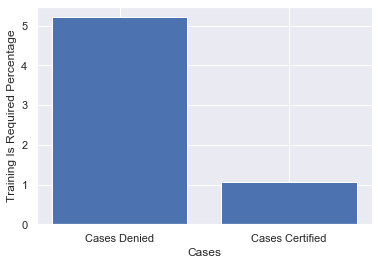

In [131]:
# visualizing using matplotlib
plt.bar(('Cases Denied','Cases Certified'),(5.21,1.07))
plt.xlabel('Cases')
plt.ylabel('Training Is Required Percentage')
plt.show()

[Text(0, 0.5, 'Training Is Required Percentage'), Text(0.5, 0, 'Cases')]

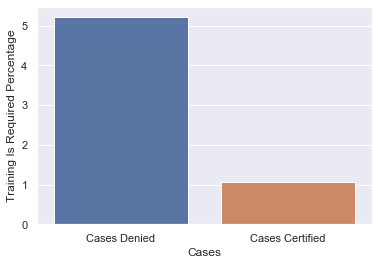

In [132]:
# visualizing using seaborn
ax = sns.barplot(x=['Cases Denied','Cases Certified'],y=[5.21,1.07])
ax.set(xlabel='Cases', ylabel='Training Is Required Percentage')

'Training is Required' percentage seems to be **higher** for Cases Denied than Cases Not Denied

Analysis of **REQUIRED_TRAINING_MONTHS** column

In [68]:
df[df['CASE_STATUS_BINARY']==1]['REQUIRED_TRAINING_MONTHS'].head()

0   NaN
2   NaN
4   NaN
5   NaN
8   NaN
Name: REQUIRED_TRAINING_MONTHS, dtype: float64

This column will have a value if training is required. Since 'training is required' is very less percentage, we think this column is not that significant for deriving insights

Analysis of **REQUIRED_FIELD_OF_TRAINING** column

In [69]:
df[df['CASE_STATUS_BINARY']==1]['REQUIRED_FIELD_OF_TRAINING'].head()

0    NaN
2    NaN
4    NaN
5    NaN
8    NaN
Name: REQUIRED_FIELD_OF_TRAINING, dtype: object

This column will have a value if training is required. Since 'training is required' is very less percentage, we think this column is not that significant for deriving insights

Analysis of **REQUIRED_EXPERIENCE** column

In [71]:
df[df['CASE_STATUS_BINARY']==1]['REQUIRED_EXPERIENCE'].value_counts()

Y    1497
N    1383
Name: REQUIRED_EXPERIENCE, dtype: int64

In [72]:
df[df['CASE_STATUS_BINARY']==0]['REQUIRED_EXPERIENCE'].value_counts()

Y    37898
N    28337
Name: REQUIRED_EXPERIENCE, dtype: int64

In [75]:
# percentage of Experience Is Required for Denied Cases
round(1497/(1497+1383)*100,2)

51.98

In [76]:
# percentage of Experience Is Required for Certified Cases
round(37898/(37898+28337)*100,2)

57.22

[Text(0, 0.5, 'Experience Is Required Percentage'), Text(0.5, 0, 'Cases')]

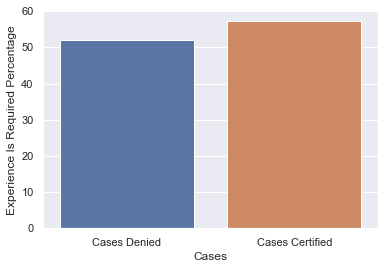

In [133]:
# visualizing using seaborn
ax = sns.barplot(x=['Cases Denied','Cases Certified'],y=[51.98,57.22])
ax.set(xlabel='Cases', ylabel='Experience Is Required Percentage')

Altough 'Experience Is Required Percentage' seems to be marginally higher for 'Cases Not Denied' than 'Cases Denied', they can be assumed to be roughly the same

Analysis of **REQUIRED_EXPERIENCE_MONTHS** column

In [93]:
df[df['CASE_STATUS_BINARY']==1]['REQUIRED_EXPERIENCE_MONTHS'].value_counts().sort_values(ascending=False).head().index[0]

24.0

In [94]:
df[df['CASE_STATUS_BINARY']==0]['REQUIRED_EXPERIENCE_MONTHS'].value_counts().sort_values(ascending=False).head().index[0]

24.0

We see here that **2 years** is the **most preferred experience** irrespective of weather Case is Denied or Not

Analysis of **ACCEPT_ALT_FIELD_OF_STUDY** column

In [95]:
df[df['CASE_STATUS_BINARY']==1]['ACCEPT_ALT_FIELD_OF_STUDY'].value_counts()

N    2360
Y     519
Name: ACCEPT_ALT_FIELD_OF_STUDY, dtype: int64

In [96]:
df[df['CASE_STATUS_BINARY']==0]['ACCEPT_ALT_FIELD_OF_STUDY'].value_counts()

N    37246
Y    28989
Name: ACCEPT_ALT_FIELD_OF_STUDY, dtype: int64

In [97]:
# percentage of Alternate Field of study is NOT accepted for education requirement for Denied Cases
round(2360/(2360+519)*100,2)

81.97

In [134]:
# percentage of Alternate Field of study is NOT accepted for education requirement for Certified Cases
round(37246/(37246+28989)*100,2)

56.23

[Text(0, 0.5, 'Alternate Field of study is NOT accepted Percentage'),
 Text(0.5, 0, 'Cases')]

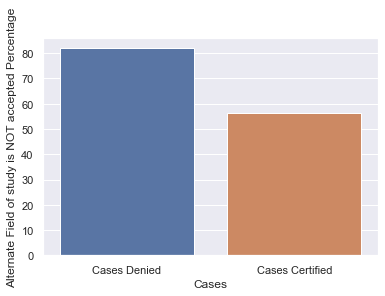

In [135]:
# visualizing using seaborn
ax = sns.barplot(x=['Cases Denied','Cases Certified'],y=[81.97,56.23])
ax.set(xlabel='Cases', ylabel='Alternate Field of study is NOT accepted Percentage')

Here we can see the glaring difference. Of all the denied cases, a staggering **82% did not meet** the education requirement as their field of study was not acceptable. This might be a reason for the denial

Analysis of **ACCEPT_ALT_MAJOR_FLD_OF_STUDY** column

In [103]:
df[df['CASE_STATUS_BINARY']==1]['ACCEPT_ALT_MAJOR_FLD_OF_STUDY'].value_counts().head()

Information Technology or Engineering or Business or Science or related    10
Finance or investment related field                                         6
ANY FIELD                                                                   6
Finance                                                                     5
Related field of study                                                      5
Name: ACCEPT_ALT_MAJOR_FLD_OF_STUDY, dtype: int64

In [104]:
df[df['CASE_STATUS_BINARY']==0]['ACCEPT_ALT_MAJOR_FLD_OF_STUDY'].value_counts().head()

Engineering, Mathematics, or a related field                           1295
See H.14 for complete list                                              641
See H.14                                                                589
Comp Sci, Comp SW, Comp Engg, App Sci, Math, Phys, or related field     403
ENGINEERING, MATHEMATICS, OR A RELATED Field                            320
Name: ACCEPT_ALT_MAJOR_FLD_OF_STUDY, dtype: int64

It seems **Engineering, Information Technology, Mathematics** and related fields are hot favourites as Alternate field of study that will be acceptable for education requirement

Analysis of **ACCEPT_ALT_COMBO** column

In [105]:
df[df['CASE_STATUS_BINARY']==1]['ACCEPT_ALT_COMBO'].value_counts()

N    2560
Y     317
Name: ACCEPT_ALT_COMBO, dtype: int64

In [106]:
df[df['CASE_STATUS_BINARY']==0]['ACCEPT_ALT_COMBO'].value_counts()

N    46266
Y    19968
Name: ACCEPT_ALT_COMBO, dtype: int64

In [130]:
# percentage of Alternate combination of education and experience will NOT be acceptable for Denied Cases
round(2560/(2560+317)*100,2)

88.98

In [136]:
# percentage of Alternate combination of education and experience will NOT be acceptable for Certified Cases
round(46266/(46266+19968)*100,2)

69.85

[Text(0, 0.5, 'Alternate Combo of edu and exp is NOT accepted Percentage'),
 Text(0.5, 0, 'Cases')]

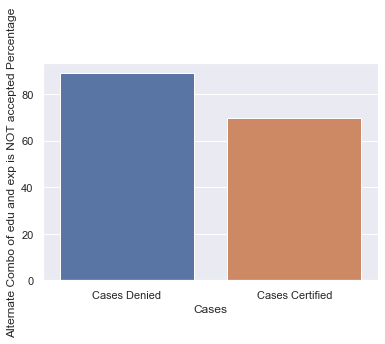

In [137]:
# visualizing using seaborn
ax = sns.barplot(x=['Cases Denied','Cases Certified'],y=[88.98,69.85])
ax.set(xlabel='Cases', ylabel='Alternate Combo of edu and exp is NOT accepted Percentage')

A similar picture is painted as **ACCEPT_ALT_FIELD_OF_STUDY** column

Analysis of **ACCEPT_ALT_COMBO_EDUCATION** column

In [138]:
df[df['CASE_STATUS_BINARY']==1]['ACCEPT_ALT_COMBO_EDUCATION'].value_counts()

Bachelor's     185
None            55
Other           52
Master's        40
High School     18
Associate's     13
Name: ACCEPT_ALT_COMBO_EDUCATION, dtype: int64

In [139]:
df[df['CASE_STATUS_BINARY']==0]['ACCEPT_ALT_COMBO_EDUCATION'].value_counts()

Bachelor's     13401
Master's        3749
Other           1363
None            1013
Doctorate        398
Associate's      101
High School       36
Name: ACCEPT_ALT_COMBO_EDUCATION, dtype: int64

**Bachelor's** seems to be widely acceptable as an alternate level of education for both Denied and Certified cases

Analysis of **ACCEPT_ALT_COMBO_ED_OTHER** column

In [142]:
df[df['CASE_STATUS_BINARY']==1]['ACCEPT_ALT_COMBO_ED_OTHER'].value_counts().head()

6TH-8TH GRADE                                                                                      3
GED                                                                                                3
Please see H.14 below                                                                              2
Extensive on the job training                                                                      2
12 MONTHS OF TRAINING OR EDUCATION IN A MEDICAL RELATED FIELD CAN BE SUBSTITUTED FOR EXPERIENCE    2
Name: ACCEPT_ALT_COMBO_ED_OTHER, dtype: int64

In [143]:
df[df['CASE_STATUS_BINARY']==0]['ACCEPT_ALT_COMBO_ED_OTHER'].value_counts().head()

3-yr post secondary education see H.14                                                166
*See H.14 for alternate level of edu. required                                         94
BachelorÆs Degree + five (5) years of progressive post-baccalaureate IT experience     51
See H.14                                                                               38
See box H.14                                                                           37
Name: ACCEPT_ALT_COMBO_ED_OTHER, dtype: int64

No Critical insight from here

Analysis of **ACCEPT_ALT_COMBO_EDUCATION_YRS** column

In [146]:
df[df['CASE_STATUS_BINARY']==1]['ACCEPT_ALT_COMBO_EDUCATION_YRS'].value_counts()

5.0     163
2.0      40
0.0      26
1.0      18
3.0      16
7.0       9
4.0       8
10.0      6
6.0       6
12.0      6
36.0      2
24.0      2
15.0      1
9.0       1
14.0      1
8.0       1
48.0      1
60.0      1
Name: ACCEPT_ALT_COMBO_EDUCATION_YRS, dtype: int64

In [147]:
df[df['CASE_STATUS_BINARY']==0]['ACCEPT_ALT_COMBO_EDUCATION_YRS'].value_counts()

5.0     12385
3.0      2173
0.0      1217
2.0      1047
4.0       927
6.0       713
1.0       560
7.0       499
8.0       204
10.0       82
60.0       48
9.0        44
24.0       24
12.0       22
36.0       18
48.0        6
11.0        4
84.0        4
96.0        3
72.0        3
15.0        2
14.0        2
18.0        1
Name: ACCEPT_ALT_COMBO_EDUCATION_YRS, dtype: int64

**5 years** seems popular for alternate combination of education

Analysis of **ACCEPT_FOREIGN_EDUCATION** column

In [148]:
df[df['CASE_STATUS_BINARY']==1]['ACCEPT_FOREIGN_EDUCATION'].value_counts()

Y    1852
N    1023
Name: ACCEPT_FOREIGN_EDUCATION, dtype: int64

In [149]:
df[df['CASE_STATUS_BINARY']==0]['ACCEPT_FOREIGN_EDUCATION'].value_counts()

Y    59029
N     7204
Name: ACCEPT_FOREIGN_EDUCATION, dtype: int64

In [150]:
# percentage of Foreign educational equivalent is NOT accepted for Denied Cases
round(1023/(1023+1852)*100,2)

35.58

In [151]:
# percentage of Foreign educational equivalent is NOT accepted for Certified Cases
round(7204/(7204+59029)*100,2)

10.88

[Text(0, 0.5, 'Foreign educational equivalent is NOT accepted Percentage'),
 Text(0.5, 0, 'Cases')]

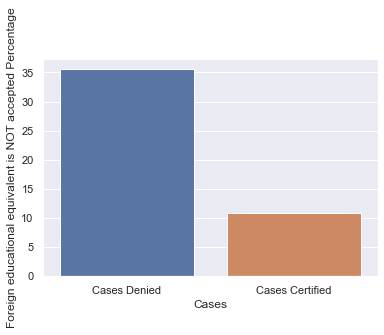

In [152]:
# visualizing using seaborn
ax = sns.barplot(x=['Cases Denied','Cases Certified'],y=[35.58,10.88])
ax.set(xlabel='Cases', ylabel='Foreign educational equivalent is NOT accepted Percentage')

**Foreign Educational Equivalent** seems to be a factor in the Denied Cases as the percentage of Foreign educational equivalent is NOT accepted for Denied cases is very high in comparision to Certified Cases

Analysis of **ACCEPT_ALT_OCCUPATION** column

In [153]:
df[df['CASE_STATUS_BINARY']==1]['ACCEPT_ALT_OCCUPATION'].value_counts()

N    1971
Y     909
Name: ACCEPT_ALT_OCCUPATION, dtype: int64

In [154]:
df[df['CASE_STATUS_BINARY']==0]['ACCEPT_ALT_OCCUPATION'].value_counts()

Y    46605
N    19630
Name: ACCEPT_ALT_OCCUPATION, dtype: int64

In [155]:
# percentage of alternate occupation is NOT acceptable for Denied Cases
round(1971/(1971+909)*100,2)

68.44

In [156]:
# percentage of alternate occupation is NOT acceptable for Certified Cases
round(19630/(19630+46605)*100,2)

29.64

[Text(0, 0.5, 'Alternate Occupation is NOT acceptable Percentage'),
 Text(0.5, 0, 'Cases')]

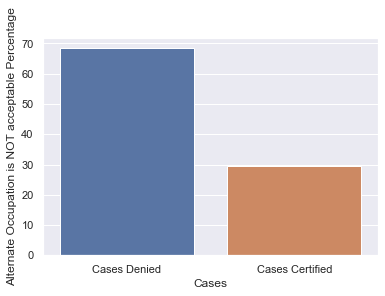

In [158]:
# visualizing using seaborn
ax = sns.barplot(x=['Cases Denied','Cases Certified'],y=[68.44,29.64])
ax.set(xlabel='Cases', ylabel='Alternate Occupation is NOT acceptable Percentage')

Again, here also it seems if the **Alternate Occupation is NOT acceptable**, then the application is **more likely to be Denied**

Analysis of **ACCEPT_ALT_OCCUPATION_MONTHS** column

In [161]:
df[df['CASE_STATUS_BINARY']==1]['ACCEPT_ALT_OCCUPATION_MONTHS'].value_counts().sort_values(ascending=False).head().index[0]

24.0

In [162]:
df[df['CASE_STATUS_BINARY']==0]['ACCEPT_ALT_OCCUPATION_MONTHS'].value_counts().sort_values(ascending=False).head().index[0]

24.0

Just like REQUIRED_EXPERIENCE_MONTHS , here also **2 years is favourite** as Alternate Occupation experience

Analysis of **ACCEPT_ALT_JOB_TITLE** column

In [165]:
df[df['CASE_STATUS_BINARY']==1]['ACCEPT_ALT_JOB_TITLE'].value_counts().head()

Employment experience in any alternate occupation is acceptable.    35
Computer Software Professional                                       8
See H.14                                                             8
Please see H.14 exp as required in 6A or 8C                          8
24 months recent experience as Nursery Worker                        8
Name: ACCEPT_ALT_JOB_TITLE, dtype: int64

In [166]:
df[df['CASE_STATUS_BINARY']==0]['ACCEPT_ALT_JOB_TITLE'].value_counts().head()

See H.14                             2562
Job Offered or Related                925
Computerrelated occupation            717
Related Occupation                    711
Job offered or related occupation     493
Name: ACCEPT_ALT_JOB_TITLE, dtype: int64

No interesting insight here

Analysis of **JOB_OPP_REQUIREMENTS_NORMAL** column

In [167]:
df[df['CASE_STATUS_BINARY']==1]['JOB_OPP_REQUIREMENTS_NORMAL'].value_counts()

Y    2621
N     261
Name: JOB_OPP_REQUIREMENTS_NORMAL, dtype: int64

In [168]:
df[df['CASE_STATUS_BINARY']==0]['JOB_OPP_REQUIREMENTS_NORMAL'].value_counts()

Y    43771
N    22464
Name: JOB_OPP_REQUIREMENTS_NORMAL, dtype: int64

In [169]:
# percentage of job opportunity’s requirements are NOT normal for Denied Cases
round(261/(261+2621)*100,2)

9.06

In [170]:
# percentage of job opportunity’s requirements are NOT normal for Certified Cases
round(22464/(22464+43771)*100,2)

33.92

[Text(0, 0.5, 'Job opportunity’s requirements are NOT normal Percentage'),
 Text(0.5, 0, 'Cases')]

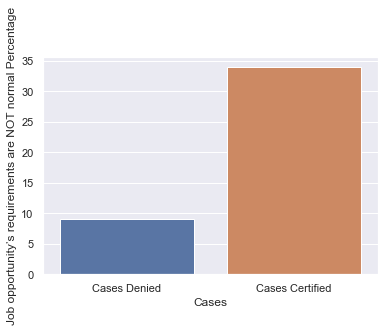

In [174]:
# visualizing using seaborn
ax = sns.barplot(x=['Cases Denied','Cases Certified'],y=[9.06,33.92])
ax.set(xlabel='Cases', ylabel='Job opportunity’s requirements are NOT normal Percentage')

This is actually an unsual insight, which suggests that the more abnormal the job opportunity's requirement, the more likely the case is to be certified